# Linear Regression on California Housing Dataset

## Loading the dataset and pre-data look assumptions

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# California Housing Dataset
"""Samples total: 20640
Dimensionality: 8
Features: real
Target: real 0.15 - 5 
(Target variable is the median house value for California districts)"""

# Attributes: Assumtion related to target variable
"""MedInc median income in block: High MedInc should result in high
target y
HouseAge median house age in block: High age less value
AveRooms average number of rooms: More rooms more price
AveBedrms average number of bedrooms: More bedrooms more price
Population block population: less population more price
AveOccup average house occupancy: less occup more price
Latitude house block latitude: latitude ,long should vary according to
high valued areas
Longitude house block longitude"""

df = fetch_california_housing()

In [3]:
type(df)

sklearn.utils.Bunch

## Data Exploration and Preprocessing

In [4]:
x = pd.DataFrame(df.data,df.target, columns=df.feature_names)
y = pd.DataFrame(df.target,df.target, columns=['Target'])
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y.head()

,Target
4.526,4.526
3.585,3.585
3.521,3.521
3.413,3.413
3.422,3.422


In [6]:
# Checking for null values
print(x.isna().sum(), y.isna().sum()) # No Null Values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64 Target    0
dtype: int64


In [7]:
# Missing values could be treated with median, mean, etc
# Categorical values could be one hot encoded

In [8]:
# Data Summary
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
y.describe()

,Target
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [10]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(np.array(x['Population']).reshape(-1,1))
x['Population'] = scaler.transform(np.array(x['Population']).reshape(-1,1))

In [11]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,-6.465442e-17,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1.000024e+00,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,-1.256123e+00,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,-5.638089e-01,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,-2.291318e-01,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,2.644949e-01,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,3.025033e+01,1243.333333,41.950000,-114.310000


In [12]:
print(len(x), len(y), len(x['MedInc']))

20640 20640 20640


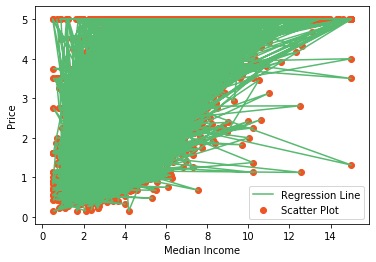

In [13]:
# Regression line
plt.plot(x['MedInc'], y, color = '#58b970', label = 'Regression Line')

# Scatter plot
plt.scatter(x['MedInc'], y, c = '#ef5423', label = 'Scatter Plot')

plt.xlabel('Median Income')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
# Splitting the dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 78)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((15480, 8), (5160, 8), (15480, 1), (5160, 1))

# Linear Regression Model

In [15]:
lr = LinearRegression()
lr.fit(train_x, train_y)

train_pred = lr.predict(train_x)
test_pred = lr.predict(test_x)

print('RMSE on train data: ', mean_squared_error(train_y, train_pred)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, test_pred)**(0.5))

RMSE on train data:  0.7265481301989271
RMSE on test data:  0.7170075976052217


# Comparison with Random Forest Algorithm

In [16]:
from sklearn.ensemble import  RandomForestRegressor

In [17]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

train_pred = rf.predict(train_x)
test_pred = rf.predict(test_x)

print('RMSE on train data: ', mean_squared_error(train_y, train_pred)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, test_pred)**(0.5))

/home/err_pv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE on train data:  0.19207068190969537
RMSE on test data:  0.49510410295590435


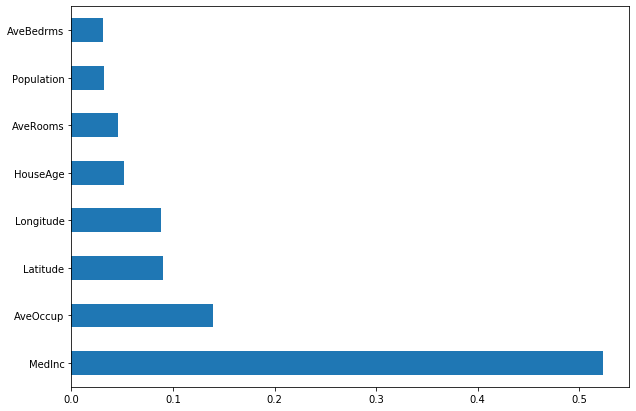

In [18]:
# Top Most important features of Random Forest Model
plt.figure(figsize=(10, 7))
imp_features = pd.Series(rf.feature_importances_, index = df.feature_names)
imp_features.nlargest(8).plot(kind='barh')

In [19]:
# Training with most important 4 features
train_x_sub = train_x[['MedInc',
                      'AveOccup',
                      'Longitude',
                      'Latitude']]

test_x_sub = test_x[['MedInc',
                      'AveOccup',
                      'Longitude',
                      'Latitude']]

rf_sub = RandomForestRegressor(max_depth=10,random_state=78)

rf.fit(train_x_sub, train_y)

# predict the target on the training and test data
train_pred_sub = rf.predict(train_x_sub)
test_pred_sub = rf.predict(test_x_sub)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, train_pred_sub)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, test_pred_sub)**(0.5))


/home/err_pv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE on train data:  0.1893783487827192
RMSE on test data:  0.5018825684640351


In [20]:
# Good Performance with only 4 features also
"""MedInc', 'AveOccup', 'Longitude', 'Latitude'"""

# Conclusion

In [25]:
# Random Forest Regressor works better
"""Only four features: MedInc', 'AveOccup', 'Longitude', 'Latitude'
are enough to predict without affecting the performance too much
badly."""

"Only four features: MedInc', 'AveOccup', 'Longitude', 'Latitude'\nare enough to predict without affecting the performance too much\nbadly."